# Fashion-Minist CNN keras

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model
import matplotlib.pyplot as plt

# obtenemos los datos para train y test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# obtenemos el dataset de validacion a partir del 20% del dataset de entrenamiento
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

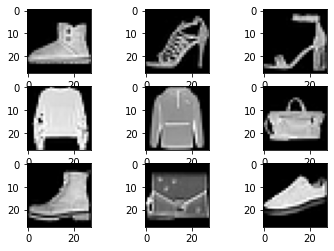

In [2]:
#Mostrmos los datos sin modificar
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
# reshape to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#normalizamos los datos
x_train = x_train.astype('float32')/255
x_validation = x_validation.astype('float32')/255
x_test = x_test.astype('float32')/255

#convertimos las salidas a categóricas
y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


# Realizamos data augmentation

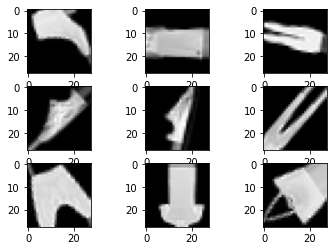

In [4]:
# Realizamos rotaciones, desplazamientos y volteamos las imagenes de forma aleatoria

#Definimos las operaciones a realizar
datagen = ImageDataGenerator(
    width_shift_range=0.1, #Desplazamiento en anchura
    height_shift_range=0.1, #Desplazamiento en altura
    horizontal_flip=True, #Volteo horizontal
    vertical_flip=True, #Volteo vertical
    rotation_range=90) #Rotacion

# Aplicamos estas operaciones a los datos de entrenamiento
datagen.fit(x_train)

# Mostramos un ejemplo de como quedan las imagenes una vez realizado el data augmentation
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# Definimos el modelo

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.15)) #Realizamos un dropout

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25)) #Realizamos un dropout
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7

In [6]:
import matplotlib.pyplot as plt

#Definimos un historico para poder representar la evolucion del modelo
def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Entrenamos el modelo

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 1.3622 - accuracy: 0.4935 - val_loss: 1.0104 - val_accuracy: 0.6183
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.9958 - accuracy: 0.6344 - val_loss: 0.8546 - val_accuracy: 0.6948
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.8811 - accuracy: 0.6780 - val_loss: 0.8136 - val_accuracy: 0.7024
Epoch 4/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.8095 - accuracy: 0.7030 - val_loss: 0.7214 - val_accuracy: 0.7416
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7613 - accuracy: 0.7215 - val_loss: 0.6783 - val_accuracy: 0.7506
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7269 - accuracy: 0.7347 - val_loss: 0.6282 - val_accuracy: 0.7727
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7027 - accuracy: 0.7423 - val_loss: 0.6450 -

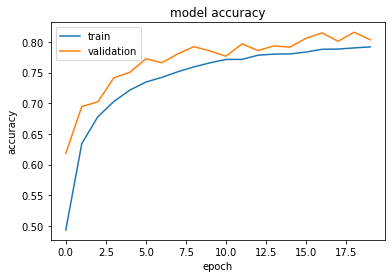

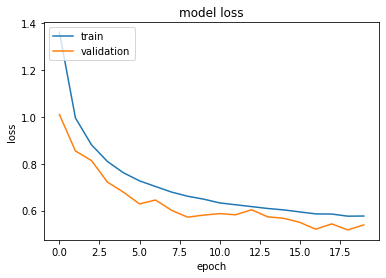

In [7]:
batch_size = 32
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                  shuffle = True,
                  epochs=epochs,validation_data=(x_validation, y_validation),
                  verbose=1)

Show_History(history)

In [8]:
#Comprobamos la tasa de acierto con los datos del test
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)
print('Accuracy test:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5525 - accuracy: 0.8002
Accuracy test: 0.8001999855041504


# Guardamos el modelo y sus pesos

In [9]:
# Guardamos el modelo entrenado como archivo hdf5
model.save('modelo.h5')  

# Para cargar el modelo nuevamente
model = load_model('modelo.h5')